ML-RL-MDP-Task

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/apple/Downloads/ml-latest-small/movies.csv")
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
df.shape

(9742, 3)

In [7]:
df.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [8]:
df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

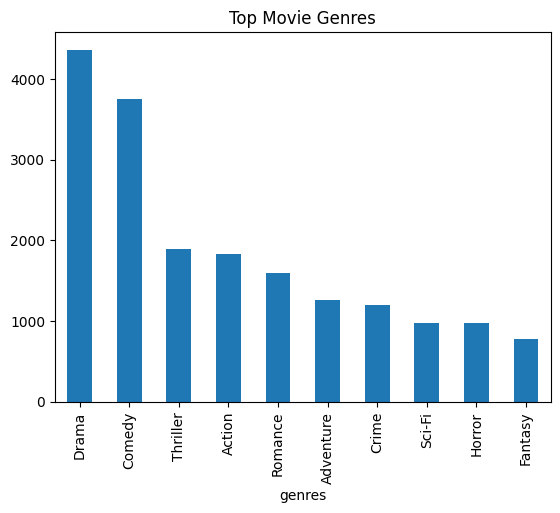

In [10]:
genres = df['genres'].str.split('|').explode()

plt.figure()
genres.value_counts().head(10).plot(kind='bar')
plt.title("Top Movie Genres")
plt.show()

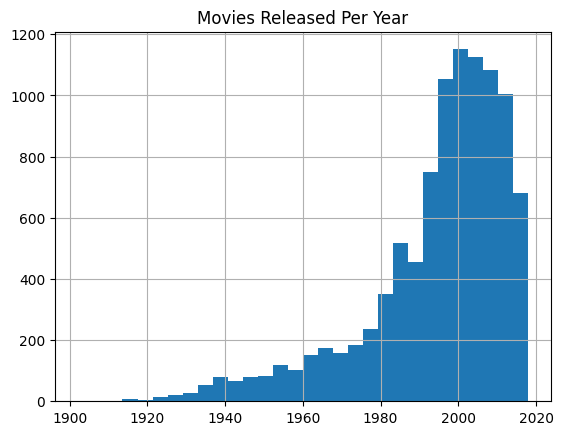

In [12]:
df['year'] = df['title'].str.extract(r'\((\d{4})\)')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df['year'].dropna().astype(int).hist(bins=30)
plt.title("Movies Released Per Year")
plt.show()

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from scipy import sparse

In [15]:
mlb = MultiLabelBinarizer()
genre_features = mlb.fit_transform(df['genres'].str.split('|'))

if sparse.issparse(genre_features):
    genre_features = genre_features.toarray()

genre_df = pd.DataFrame(
    genre_features, 
    columns=mlb.classes_
)

df_features = pd.concat([df[['movieId']], genre_df], axis=1)
df_features.head()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
kmeans = KMeans(n_clusters=8, random_state=42)
df_features['cluster'] = kmeans.fit_predict(genre_df)

df_features[['movieId', 'cluster']].head()

,movieId,cluster
0,1,4
1,2,4
2,3,5
3,4,0
4,5,5


In [19]:
df[df_features['cluster'] == 0].head(5)


,movieId,title,genres,year
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
10,11,"American President, The (1995)",Comedy|Drama|Romance,1995.0
16,17,Sense and Sensibility (1995),Drama|Romance,1995.0
24,25,Leaving Las Vegas (1995),Drama|Romance,1995.0
27,28,Persuasion (1995),Drama|Romance,1995.0


MDP (Markov Decision Process)

State Representation

In [21]:

user_state = np.array([0.2, 0.7, 0.1]) 

Action Space

In [22]:
action_space = df_features['movieId'].values

Reward Function

In [24]:
def reward(clicked):
    return 1 if clicked else -0.1

reward(True)

1

SIMPLE RL SIMULATION

In [27]:
num_states = 10
num_actions = len(action_space)

Q = np.zeros((num_states, num_actions))
alpha = 0.1
gamma = 0.9
epsilon = 0.2

num_states

10

In [33]:
import random
import stat

def choose_action(state):
    if random.random() < epsilon:
        return random.randint(0, num_actions-1)
    return np.argmax(Q[state])

    for episode in range(100):
        state = random.randint(0, num_states-1)
    
    action = choose_action(state)
    reward_value = random.choice([1, -0.1])
    next_state = random.randint(0, num_states-1)
    
    Q[state, action] += alpha * (
        reward_value + gamma * np.max(Q[next_state]) - Q[state, action]
    )
    
print(choose_action(state=0))
print(range(100))

9333
range(0, 100)
